In [1]:
from keras.datasets import imdb

In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 4s 0us/step


In [3]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

1646592/1641221 [==============================] - 1s 0us/step


In [5]:
def decode_review(review):
    # Offset by 3 because 0, 1, and 2 are reserved for padding, start, and unknown
    return ' '.join([reverse_word_index.get(i - 3, '?') for i in review])

decode_review(train_data[0])

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

Converting lists to tensors

In [6]:
import numpy as np

Using One-hot encoding

In [7]:
def vectorize_sequences(sequences, dimention=10000):
    results = np.zeros((len(sequences), dimention))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

In [9]:
X_train = vectorize_sequences(train_data)
X_test = vectorize_sequences(test_data)

In [10]:
X_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [12]:
y_train = np.asarray(train_labels).astype(np.float32)
y_test = np.asarray(test_labels).astype(np.float32)

Building the model

In [13]:
from keras import models
from keras import layers

model = models.Sequential()

model.add(layers.Dense(16, activation="relu", input_shape=(10000,)))
model.add(layers.Dense(16, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))

In [15]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

Using custom metrics and losses

In [16]:
from keras import losses
from keras import optimizers
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

## Validating the model

In [18]:
X_val = X_train[:10000]
y_val = y_train[:10000]

partial_X_train = X_train[10000:]
partial_y_train = y_train[10000:]

## Train the model

In [19]:
history = model.fit(partial_X_train, 
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(X_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 7s 442us/step - loss: 0.4975 - binary_accuracy: 0.7951 - val_loss: 0.3711 - val_binary_accuracy: 0.8718
Epoch 2/20
15000/15000 [==============================] - 4s 298us/step - loss: 0.2956 - binary_accuracy: 0.9048 - val_loss: 0.2990 - val_binary_accuracy: 0.8903
Epoch 3/20
15000/15000 [==============================] - 4s 287us/step - loss: 0.2159 - binary_accuracy: 0.9285 - val_loss: 0.3079 - val_binary_accuracy: 0.8723
Epoch 4/20
15000/15000 [==============================] - 5s 309us/step - loss: 0.1742 - binary_accuracy: 0.9431 - val_loss: 0.2829 - val_binary_accuracy: 0.8846
Epoch 5/20
15000/15000 [==============================] - 5s 305us/step - loss: 0.1416 - binary_accuracy: 0.9542 - val_loss: 0.2865 - val_binary_accuracy: 0.8845
Epoch 6/20
15000/15000 [==============================] - 4s 288us/step - loss: 0.1144 - binary_accuracy: 0.9651 - val_loss: 0.3106 - val_bi

In [21]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_binary_accuracy', 'loss', 'binary_accuracy'])

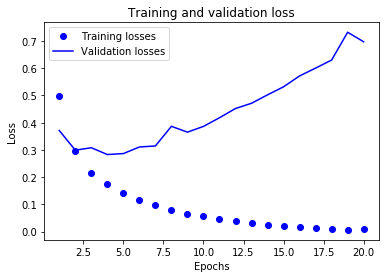

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline  

loss_values = history_dict["loss"]
val_loss_values = history_dict['val_loss']

epochs = np.arange(1, 21, 1)

plt.plot(epochs, loss_values, 'bo', label='Training losses')
plt.plot(epochs, val_loss_values, 'b', label='Validation losses')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

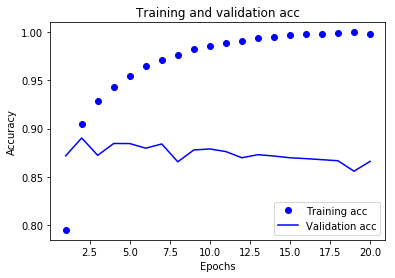

In [27]:
acc_values = history_dict["binary_accuracy"]
val_acc_values = history_dict['val_binary_accuracy']

plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [30]:
model = models.Sequential()

model.add(layers.Dense(16, activation="relu", input_shape=(10000,)))
model.add(layers.Dense(16, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

model.fit(X_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(X_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 7s 285us/step - loss: 0.4599 - binary_accuracy: 0.8206
Epoch 2/4
25000/25000 [==============================] - 5s 200us/step - loss: 0.2622 - binary_accuracy: 0.9094
Epoch 3/4
25000/25000 [==============================] - 4s 172us/step - loss: 0.2052 - binary_accuracy: 0.9274
Epoch 4/4
25000/25000 [==============================] - 5s 211us/step


In [31]:
model.predict(X_test[:10])

array([[0.17550963],
       [0.9998741 ],
       [0.88147074],
       [0.7664327 ],
       [0.93492573],
       [0.8125824 ],
       [0.9975164 ],
       [0.01360782],
       [0.95551646],
       [0.9866882 ]], dtype=float32)